In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
import pandas as pd 

In [ ]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target
df['target'] = y

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [22]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [24]:
correlations = df.corr()['target'].sort_values(ascending=False) #for choosing only the best features
correlations

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

In [ ]:
X = df[['bmi','bp']].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=  train_test_split(X, y, test_size=0.25, random_state=2021)
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
X_train[:10]

X_train.shape=  (331, 2)
y_train.shape=  (331,)


array([[-0.03315126, -0.03321323],
       [-0.02560657, -0.04009893],
       [ 0.00888341,  0.04252949],
       [ 0.07786339,  0.05285804],
       [-0.0105172 , -0.00567042],
       [ 0.05954058, -0.00222757],
       [ 0.0433734 , -0.03321323],
       [-0.06009656, -0.02977038],
       [-0.00297252,  0.04941519],
       [ 0.02289497,  0.05285804]])

In [41]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))

Ridge MSE: 3364.0842163745947


In [42]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))

Lasso MSE: 3370.339715674859


In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

model = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
model.fit(X_train, y_train)
y_pred_poly = model.predict(X_test)

print("Polynomial Regression MSE:", mean_squared_error(y_test, y_pred_poly))

Polynomial Regression MSE: 3357.272850066822


In [ ]:
import numpy as np

X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
y_pred_normal = X_test_b.dot(theta_best)

print("Normal Equation MSE:", mean_squared_error(y_test, y_pred_normal))


Normal Equation MSE: 3357.2728500668213


In [59]:
import matplotlib.pyplot as plt

def plot_pred_vs_actual(y_test, y_pred, title=""):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r-")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


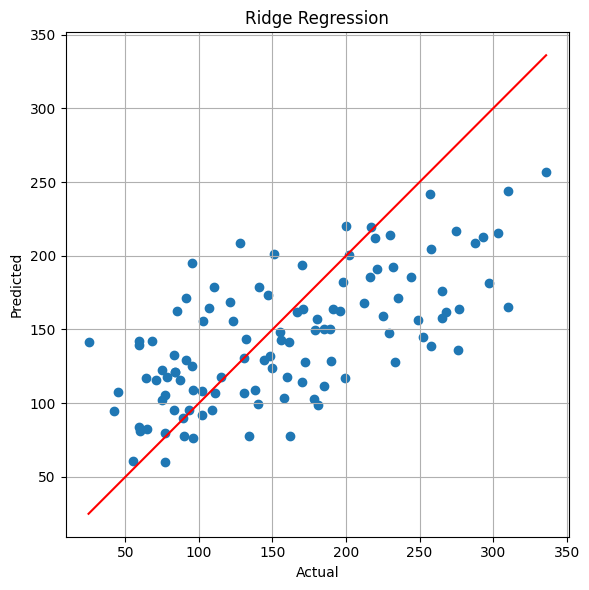

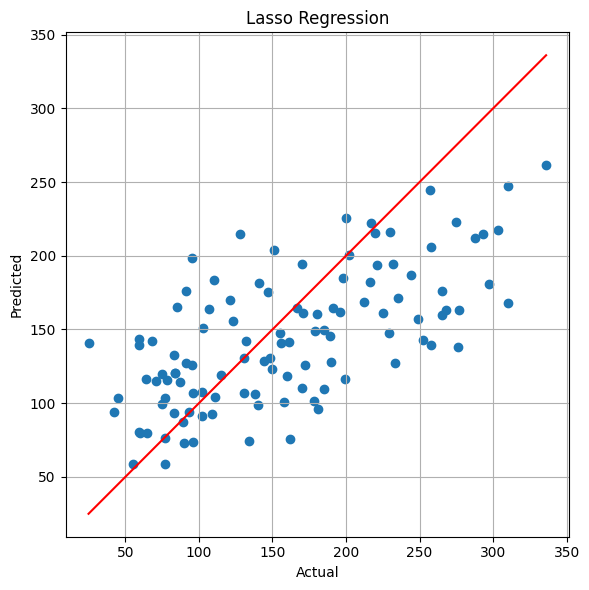

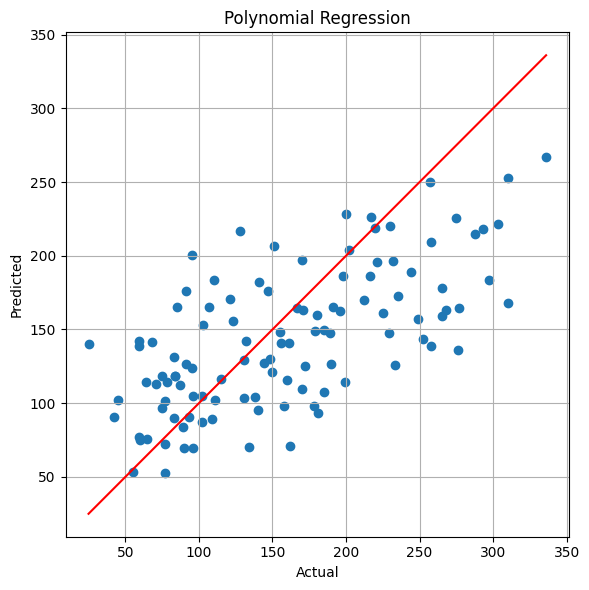

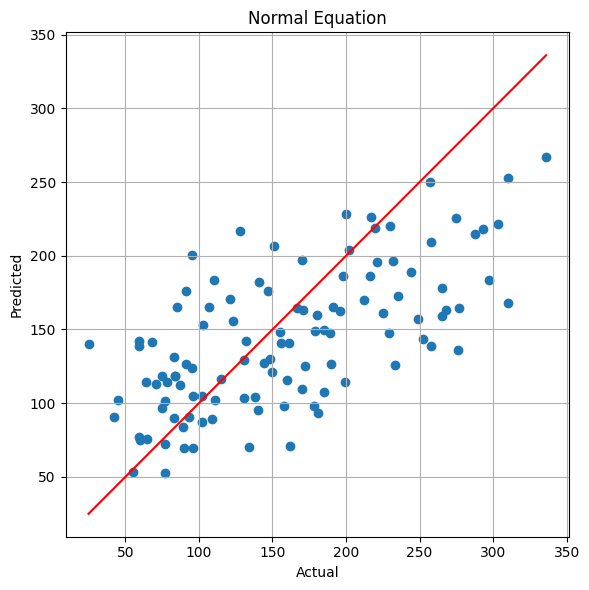

In [60]:
plot_pred_vs_actual(y_test, y_pred_ridge, "Ridge Regression")
plot_pred_vs_actual(y_test, y_pred_lasso, "Lasso Regression")
plot_pred_vs_actual(y_test, y_pred_poly, "Polynomial Regression")
plot_pred_vs_actual(y_test, y_pred_normal, "Normal Equation")
